In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import pprint
from collections import Counter
import itertools
import seaborn as sns

In [11]:
# Data file path
us_path = "resources/US_youtube_trending_data.csv"
gb_path = "resources/GB_youtube_trending_data.csv"
ca_path = "resources/CA_youtube_trending_data.csv"

# Convert data into pandas dataframe
df_us = pd.read_csv(us_path)
df_gb = pd.read_csv(gb_path)
df_ca = pd.read_csv(ca_path)

# Drop unnecessary rows 
df_us.drop(['channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'], inplace=True, axis=1)
df_gb.drop(['channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'], inplace=True, axis=1)
df_ca.drop(['channelId', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'], inplace=True, axis=1)

# Add country row for later comparison
df_us['country'] = 'US'
df_gb['country'] = 'GB'
df_ca['country'] = 'CA'

frames = [df_us, df_gb, df_ca]

# Merge all three dataframes
df_merge = pd.concat(frames)

# Export to csv
df_merge.to_csv("merge_US_GB_CA.csv", index=None)

In [3]:
# Possible only get the unique titles
#df_us["title"].unique()

#df_us.head()

In [14]:
# Lowercase title and tags columns 
df_merge['tags'] = df_merge['tags'].str.lower()
df_merge['title'] = df_merge['title'].str.lower()
df_merge['description'] = df_merge['description'].str.lower()

df_merge.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,country,tag content,title content,description content
0,3C66w5Z0ixs,i asked her to be my girlfriend...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,subscribe to brawadis ▶ http://bit.ly/subscrib...,US,"[brawadis, prank, basketball, skits, ghost, fu...","[I, ASKED, HER, TO, BE, MY, GIRLFRIEND...]","[SUBSCRIBE, to, BRAWADIS, ▶, http://bit.ly/Sub..."
1,M9Pmf9AB4Mo,apex legends | stories from the outlands – “th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,apex legends|apex legends characters|new apex ...,2381688,146739,2794,16549,"while running her own modding shop, ramya pare...",US,"[Apex Legends, Apex Legends characters, new Ap...","[Apex, Legends, |, Stories, from, the, Outland...","[While, running, her, own, modding, shop,, Ram..."
2,J78aPJ3VyNs,i left youtube for a month and this is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,i left youtube for a month and this is what ha...,US,"[jacksepticeye, funny, funny meme, memes, jack...","[I, left, youtube, for, a, month, and, THIS, i...","[I, left, youtube, for, a, month, and, this, i..."
3,kXLn3HkpjaA,xxl 2020 freshman class revealed - official an...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,subscribe to xxl → http://bit.ly/subscribe-xxl...,US,"[xxl freshman, xxl freshmen, 2020 xxl freshman...","[XXL, 2020, Freshman, Class, Revealed, -, Offi...","[Subscribe, to, XXL, →, http://bit.ly/subscrib..."
4,VIUo6yapDbc,ultimate diy home movie theater for the labran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,the labrant family|diy|interior design|makeove...,1123889,45802,964,2196,transforming the labrant family's empty white ...,US,"[The LaBrant Family, DIY, Interior Design, Mak...","[Ultimate, DIY, Home, Movie, Theater, for, The...","[Transforming, The, LaBrant, Family's, empty, ..."


In [15]:
# Splitting tag and title contents for easier parsing
df_merge['tag content'] = df_merge['tags'].str.split("|")
df_merge['title content'] = df_merge['title'].str.split()
df_merge['description content'] = df_merge['description'].str.split()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,country,tag content,title content,description content
0,3C66w5Z0ixs,i asked her to be my girlfriend...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,subscribe to brawadis ▶ http://bit.ly/subscrib...,US,"[brawadis, prank, basketball, skits, ghost, fu...","[i, asked, her, to, be, my, girlfriend...]","[subscribe, to, brawadis, ▶, http://bit.ly/sub..."
1,M9Pmf9AB4Mo,apex legends | stories from the outlands – “th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,apex legends|apex legends characters|new apex ...,2381688,146739,2794,16549,"while running her own modding shop, ramya pare...",US,"[apex legends, apex legends characters, new ap...","[apex, legends, |, stories, from, the, outland...","[while, running, her, own, modding, shop,, ram..."
2,J78aPJ3VyNs,i left youtube for a month and this is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,i left youtube for a month and this is what ha...,US,"[jacksepticeye, funny, funny meme, memes, jack...","[i, left, youtube, for, a, month, and, this, i...","[i, left, youtube, for, a, month, and, this, i..."
3,kXLn3HkpjaA,xxl 2020 freshman class revealed - official an...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,subscribe to xxl → http://bit.ly/subscribe-xxl...,US,"[xxl freshman, xxl freshmen, 2020 xxl freshman...","[xxl, 2020, freshman, class, revealed, -, offi...","[subscribe, to, xxl, →, http://bit.ly/subscrib..."
4,VIUo6yapDbc,ultimate diy home movie theater for the labran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,the labrant family|diy|interior design|makeove...,1123889,45802,964,2196,transforming the labrant family's empty white ...,US,"[the labrant family, diy, interior design, mak...","[ultimate, diy, home, movie, theater, for, the...","[transforming, the, labrant, family's, empty, ..."


In [7]:
#Create total frequency count of individual words in title 
title_list = df_merge['title content'].to_list()
all_title_counts = dict(Counter(itertools.chain.from_iterable(df_merge['title content'].to_list())))

#Convert to dataframe and sort
df_title = pd.DataFrame(list(all_title_counts.items()),columns = ['word','count']) 
df_title.sort_values(by='count', ascending=False)

,word,count
6,|,27839
42,-,23717
18,the,22027
17,to,9851
29,a,8921
...,...,...
6585,11/08/20,1
19943,bali,1
19944,(&,1
19945,spearfishing,1


In [16]:
#Create total frequency count of individual tags 
df_merge['tag content'].to_list()
tag_counts = dict(Counter(itertools.chain.from_iterable(df_merge['tag content'].to_list())))

#Convert to dataframe and sort
df_tags = pd.DataFrame(list(tag_counts.items()),columns = ['tag','count']) 
df_tags = df_tags.sort_values(by='count', ascending=False)


,tag,count
0,CA,"[[clash diljit dosanjh, diljit dosanjh, diljit..."
1,GB,"[[jacksepticeye, funny, funny meme, memes, jac..."
2,US,"[[brawadis, prank, basketball, skits, ghost, f..."


In [29]:
# Getting the total word count of video title (title length)
df_merge['total count title'] = df_merge['title'].str.split().str.len()

# Getting the total tag count of video tags (tag length)
df_merge['total count tag'] = df_merge['tags'].str.split("|").str.len()

df_merge.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,country,tag content,title content,description content,total count title,total count tag
0,3C66w5Z0ixs,i asked her to be my girlfriend...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,subscribe to brawadis ▶ http://bit.ly/subscrib...,US,"[brawadis, prank, basketball, skits, ghost, fu...","[i, asked, her, to, be, my, girlfriend...]","[subscribe, to, brawadis, ▶, http://bit.ly/sub...",7,15
1,M9Pmf9AB4Mo,apex legends | stories from the outlands – “th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,apex legends|apex legends characters|new apex ...,2381688,146739,2794,16549,"while running her own modding shop, ramya pare...",US,"[apex legends, apex legends characters, new ap...","[apex, legends, |, stories, from, the, outland...","[while, running, her, own, modding, shop,, ram...",10,25
2,J78aPJ3VyNs,i left youtube for a month and this is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,i left youtube for a month and this is what ha...,US,"[jacksepticeye, funny, funny meme, memes, jack...","[i, left, youtube, for, a, month, and, this, i...","[i, left, youtube, for, a, month, and, this, i...",11,30
3,kXLn3HkpjaA,xxl 2020 freshman class revealed - official an...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,subscribe to xxl → http://bit.ly/subscribe-xxl...,US,"[xxl freshman, xxl freshmen, 2020 xxl freshman...","[xxl, 2020, freshman, class, revealed, -, offi...","[subscribe, to, xxl, →, http://bit.ly/subscrib...",8,23
4,VIUo6yapDbc,ultimate diy home movie theater for the labran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,the labrant family|diy|interior design|makeove...,1123889,45802,964,2196,transforming the labrant family's empty white ...,US,"[the labrant family, diy, interior design, mak...","[ultimate, diy, home, movie, theater, for, the...","[transforming, the, labrant, family's, empty, ...",9,33


In [80]:

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol']

# Create empty list to fill with tumor vol data (for plotting)
vol_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    vol_final = df_merge['total count title'].loc[df_merge['country'] == treatment] 
    vol_tumor.append(vol_final)


KeyError: 'Capomulin'

# Title Count Boxplots

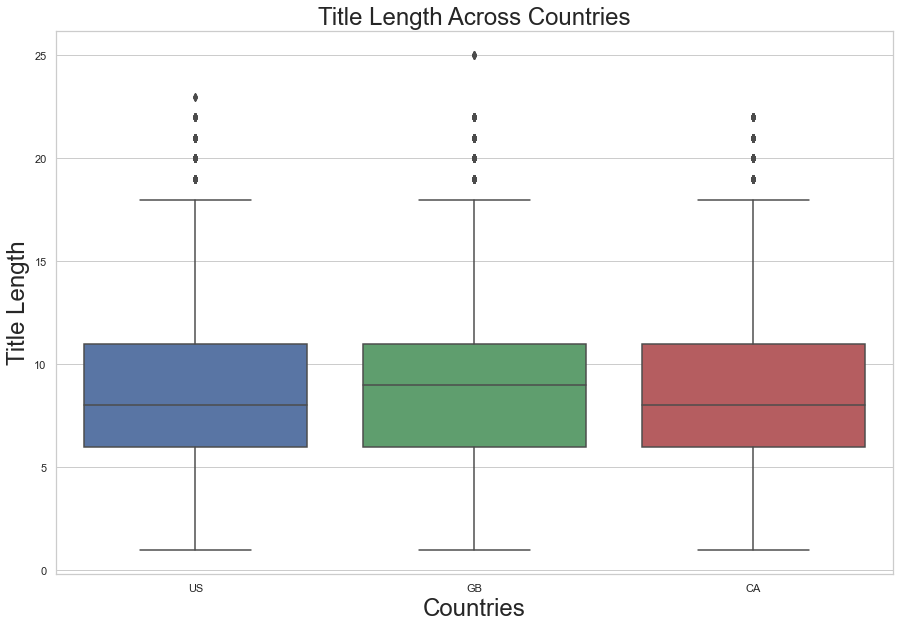

In [126]:
my_pal = {"US": "b", "GB": "g", "CA":"r"}
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle("")
ax.set_title("Title Length Across Countries", fontdict={'fontsize':24})
sns.boxplot(x=df_merge["country"], y=df_merge["total count title"], palette=my_pal)

ax.set_xlabel("Countries", fontdict={'fontsize':24})
ax.set_ylabel("Title Length", fontdict={'fontsize':24})

plt.savefig("TitleCountBoxplot.png")
plt.show()

In [60]:
usa = df_merge[df_merge["country"] == 'US']
title_usa = usa['total count title']

gb = df_merge[df_merge["country"] == 'GB']
title_gb = gb['total count title']

ca = df_merge[df_merge["country"] == 'CA']
title_ca = ca['total count title']

In [61]:
# Quartile calculations for title length US
us_quartiles = title_usa.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of US title length is: {lowerq}")
print(f"The upper quartile of US title length is: {upperq}")
print(f"The interquartile range of US title length is: {iqr}")
print(f"The the median of US title length is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of US title length is: 6.0
The upper quartile of US title length is: 11.0
The interquartile range of US title length is: 5.0
The the median of US title length is: 8.0 
Values below -1.5 could be outliers.
Values above 18.5 could be outliers.


In [63]:
# Quartile calculations for title length GB
gb_quartiles = title_gb.quantile([.25,.5,.75])
gb_lowerq = gb_quartiles[0.25]
gb_upperq = gb_quartiles[0.75]
gb_iqr = gb_upperq-gb_lowerq

print(f"The lower quartile of GB title length is: {gb_lowerq}")
print(f"The upper quartile of GB title length is: {gb_upperq}")
print(f"The interquartile range of GB title length is: {gb_iqr}")
print(f"The the median of GB title length is: {gb_quartiles[0.5]} ")

gb_lower_bound = gb_lowerq - (1.5*gb_iqr)
gb_upper_bound = gb_upperq + (1.5*gb_iqr)
print(f"Values below {gb_lower_bound} could be outliers.")
print(f"Values above {gb_upper_bound} could be outliers.")


The lower quartile of GB title length is: 6.0
The upper quartile of GB title length is: 11.0
The interquartile range of GB title length is: 5.0
The the median of GB title length is: 9.0 
Values below -1.5 could be outliers.
Values above 18.5 could be outliers.


In [64]:
# Quartile calculations for title length CA
ca_quartiles = title_ca.quantile([.25,.5,.75])
ca_lowerq = ca_quartiles[0.25]
ca_upperq = ca_quartiles[0.75]
ca_iqr = ca_upperq-ca_lowerq

print(f"The lower quartile of CA title length is: {ca_lowerq}")
print(f"The upper quartile of CA title length is: {ca_upperq}")
print(f"The interquartile range of CA title length is: {ca_iqr}")
print(f"The the median of CA title length is: {quartiles[0.5]} ")

ca_lower_bound = ca_lowerq - (1.5*ca_iqr)
ca_upper_bound = ca_upperq + (1.5*ca_iqr)
print(f"Values below {ca_lower_bound} could be outliers.")
print(f"Values above {ca_upper_bound} could be outliers.")

The lower quartile of CA title length is: 6.0
The upper quartile of CA title length is: 11.0
The interquartile range of CA title length is: 5.0
The the median of CA title length is: 8.0 
Values below -1.5 could be outliers.
Values above 18.5 could be outliers.


# Tag Count Boxplots

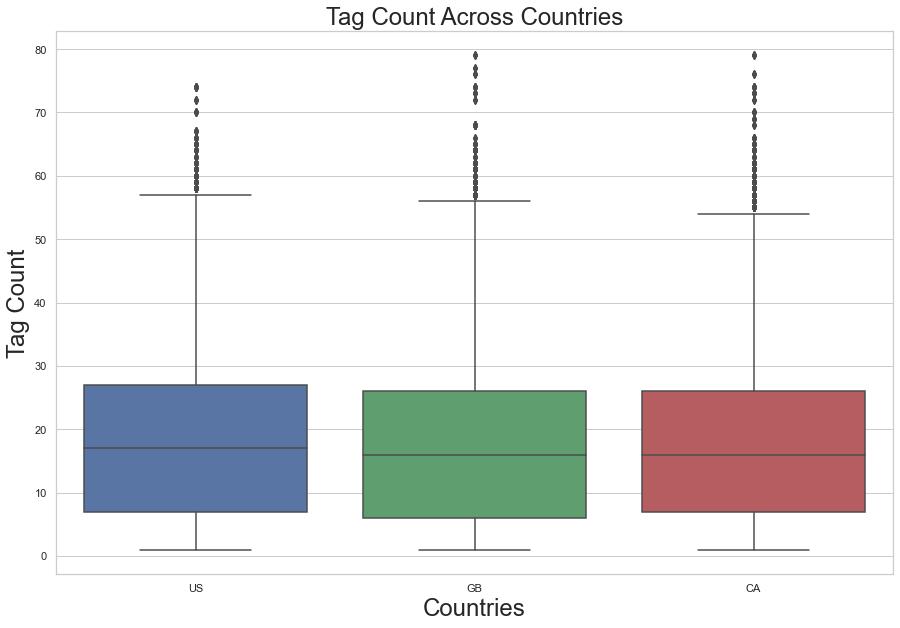

In [125]:
# Boxplot of tag count
my_pal = {"US": "b", "GB": "g", "CA":"r"}
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(15,10))
plt.suptitle("")
ax.set_title("Tag Count Across Countries", fontdict={'fontsize':24})
sns.boxplot(x=df_merge["country"], y=df_merge["total count tag"], palette=my_pal)

ax.set_xlabel("Countries", fontdict={'fontsize':24})
ax.set_ylabel("Tag Count", fontdict={'fontsize':24})

plt.savefig("TagCountBoxplot.png")
plt.show()

In [66]:
usa = df_merge[df_merge["country"] == 'US']
tag_usa = usa['total count tag']

gb = df_merge[df_merge["country"] == 'GB']
tag_gb = gb['total count tag']

ca = df_merge[df_merge["country"] == 'CA']
tag_ca = ca['total count tag']

In [69]:
# Quartile calculations for title length US
us_tag_quartiles = tag_usa.quantile([.25,.5,.75])
us_tag_lowerq = us_tag_quartiles[0.25]
us_tag_upperq = us_tag_quartiles[0.75]
us_tag_iqr = us_tag_upperq-us_tag_lowerq

print(f"The lower quartile of US title length is: {us_tag_lowerq}")
print(f"The upper quartile of US title length is: {us_tag_upperq}")
print(f"The interquartile range of US title length is: {us_tag_iqr}")
print(f"The the median of US title length is: {us_tag_quartiles[0.5]} ")

us_tag_lower_bound = us_tag_lowerq - (1.5*us_tag_iqr)
us_tag_upper_bound = us_tag_upperq + (1.5*us_tag_iqr)
print(f"Values below {us_tag_lower_bound} could be outliers.")
print(f"Values above {us_tag_upper_bound} could be outliers.")

The lower quartile of US title length is: 7.0
The upper quartile of US title length is: 27.0
The interquartile range of US title length is: 20.0
The the median of US title length is: 17.0 
Values below -23.0 could be outliers.
Values above 57.0 could be outliers.


In [70]:
# Quartile calculations for title length GB
gb_tag_quartiles = tag_gb.quantile([.25,.5,.75])
gb_tag_lowerq = gb_tag_quartiles[0.25]
gb_tag_upperq = gb_tag_quartiles[0.75]
gb_tag_iqr = gb_tag_upperq-gb_tag_lowerq

print(f"The lower quartile of US title length is: {gb_tag_lowerq}")
print(f"The upper quartile of US title length is: {gb_tag_upperq}")
print(f"The interquartile range of US title length is: {gb_tag_iqr}")
print(f"The the median of US title length is: {gb_tag_quartiles[0.5]} ")

gb_tag_lower_bound = gb_tag_lowerq - (1.5*gb_tag_iqr)
gb_tag_upper_bound = gb_tag_upperq + (1.5*gb_tag_iqr)
print(f"Values below {gb_tag_lower_bound} could be outliers.")
print(f"Values above {gb_tag_upper_bound} could be outliers.")

The lower quartile of US title length is: 6.0
The upper quartile of US title length is: 26.0
The interquartile range of US title length is: 20.0
The the median of US title length is: 16.0 
Values below -24.0 could be outliers.
Values above 56.0 could be outliers.


In [71]:
# Quartile calculations for title length GB
ca_tag_quartiles = tag_ca.quantile([.25,.5,.75])
ca_tag_lowerq = ca_tag_quartiles[0.25]
ca_tag_upperq = ca_tag_quartiles[0.75]
ca_tag_iqr = ca_tag_upperq-ca_tag_lowerq

print(f"The lower quartile of US title length is: {ca_tag_lowerq}")
print(f"The upper quartile of US title length is: {ca_tag_upperq}")
print(f"The interquartile range of US title length is: {ca_tag_iqr}")
print(f"The the median of US title length is: {ca_tag_quartiles[0.5]} ")

ca_tag_lower_bound = ca_tag_lowerq - (1.5*ca_tag_iqr)
ca_tag_upper_bound = ca_tag_upperq + (1.5*ca_tag_iqr)
print(f"Values below {ca_tag_lower_bound} could be outliers.")
print(f"Values above {ca_tag_upper_bound} could be outliers.")

The lower quartile of US title length is: 7.0
The upper quartile of US title length is: 26.0
The interquartile range of US title length is: 19.0
The the median of US title length is: 16.0 
Values below -21.5 could be outliers.
Values above 54.5 could be outliers.


In [9]:
# Published Times Analysis 

# Remove the dates, mins, and seconds in 'publshedAt' column 
df_us['publishedAt'] = df_us['publishedAt'].str[10:]
df_us['publishedAt'] = df_us['publishedAt'].str[:4]

df_gb['publishedAt'] = df_gb['publishedAt'].str[10:]
df_gb['publishedAt'] = df_gb['publishedAt'].str[:4]

df_ca['publishedAt'] = df_ca['publishedAt'].str[10:]
df_ca['publishedAt'] = df_ca['publishedAt'].str[:4]

In [10]:
# Create a dataframe with published time counts
time_counts_us = df_us['publishedAt'].value_counts().to_dict()
time_counts_gb = df_gb['publishedAt'].value_counts().to_dict()
time_counts_ca = df_ca['publishedAt'].value_counts().to_dict()
time_counts_ca

{'T16:': 5124,
 'T17:': 5110,
 'T15:': 4207,
 'T18:': 3620,
 'T19:': 3498,
 'T20:': 3057,
 'T22:': 2880,
 'T14:': 2818,
 'T21:': 2756,
 'T13:': 2297,
 'T23:': 2217,
 'T00:': 1806,
 'T04:': 1802,
 'T05:': 1560,
 'T01:': 1495,
 'T12:': 1425,
 'T03:': 1297,
 'T02:': 1273,
 'T09:': 1137,
 'T11:': 1024,
 'T10:': 865,
 'T08:': 761,
 'T06:': 588,
 'T07:': 527}

In [11]:
# Create a dataframe with categoryId counts
category_counts_us = df_us['categoryId'].value_counts().to_dict()
category_counts_gb = df_gb['categoryId'].value_counts().to_dict()
category_counts_ca = df_ca['categoryId'].value_counts().to_dict()
category_counts_ca

{24: 11269,
 10: 8095,
 20: 6757,
 17: 6496,
 22: 4644,
 23: 3629,
 28: 2598,
 26: 2419,
 25: 2267,
 1: 1769,
 27: 1394,
 2: 1109,
 19: 330,
 15: 326,
 29: 42}